In [1]:
import numpy as np
import xarray as xr
from xcube_resampling.rectify import rectify_dataset

In [2]:
def imshow(var):
    h, w = var.shape
    sx = 14
    sy = sx * h / w
    var.plot.imshow(figsize=(sx, sy), vmax=0.20, cmap="gray")

In [3]:
%%time
source_ds = xr.open_zarr("./inputdata/S3-OLCI-L2A.zarr.zip", consolidated=False)
source_ds

CPU times: user 108 ms, sys: 13 ms, total: 121 ms
Wall time: 121 ms


<xarray.Dataset> Size: 72MB
Dimensions:        (y: 1890, x: 1189)
Coordinates:
    lat            (y, x) float64 18MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    lon            (y, x) float64 18MB dask.array<chunksize=(512, 512), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    quality_flags  (y, x) uint32 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_3         (y, x) float32 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_6         (y, x) float32 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_8         (y, x) float32 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

CPU times: user 448 ms, sys: 59.9 ms, total: 508 ms
Wall time: 497 ms


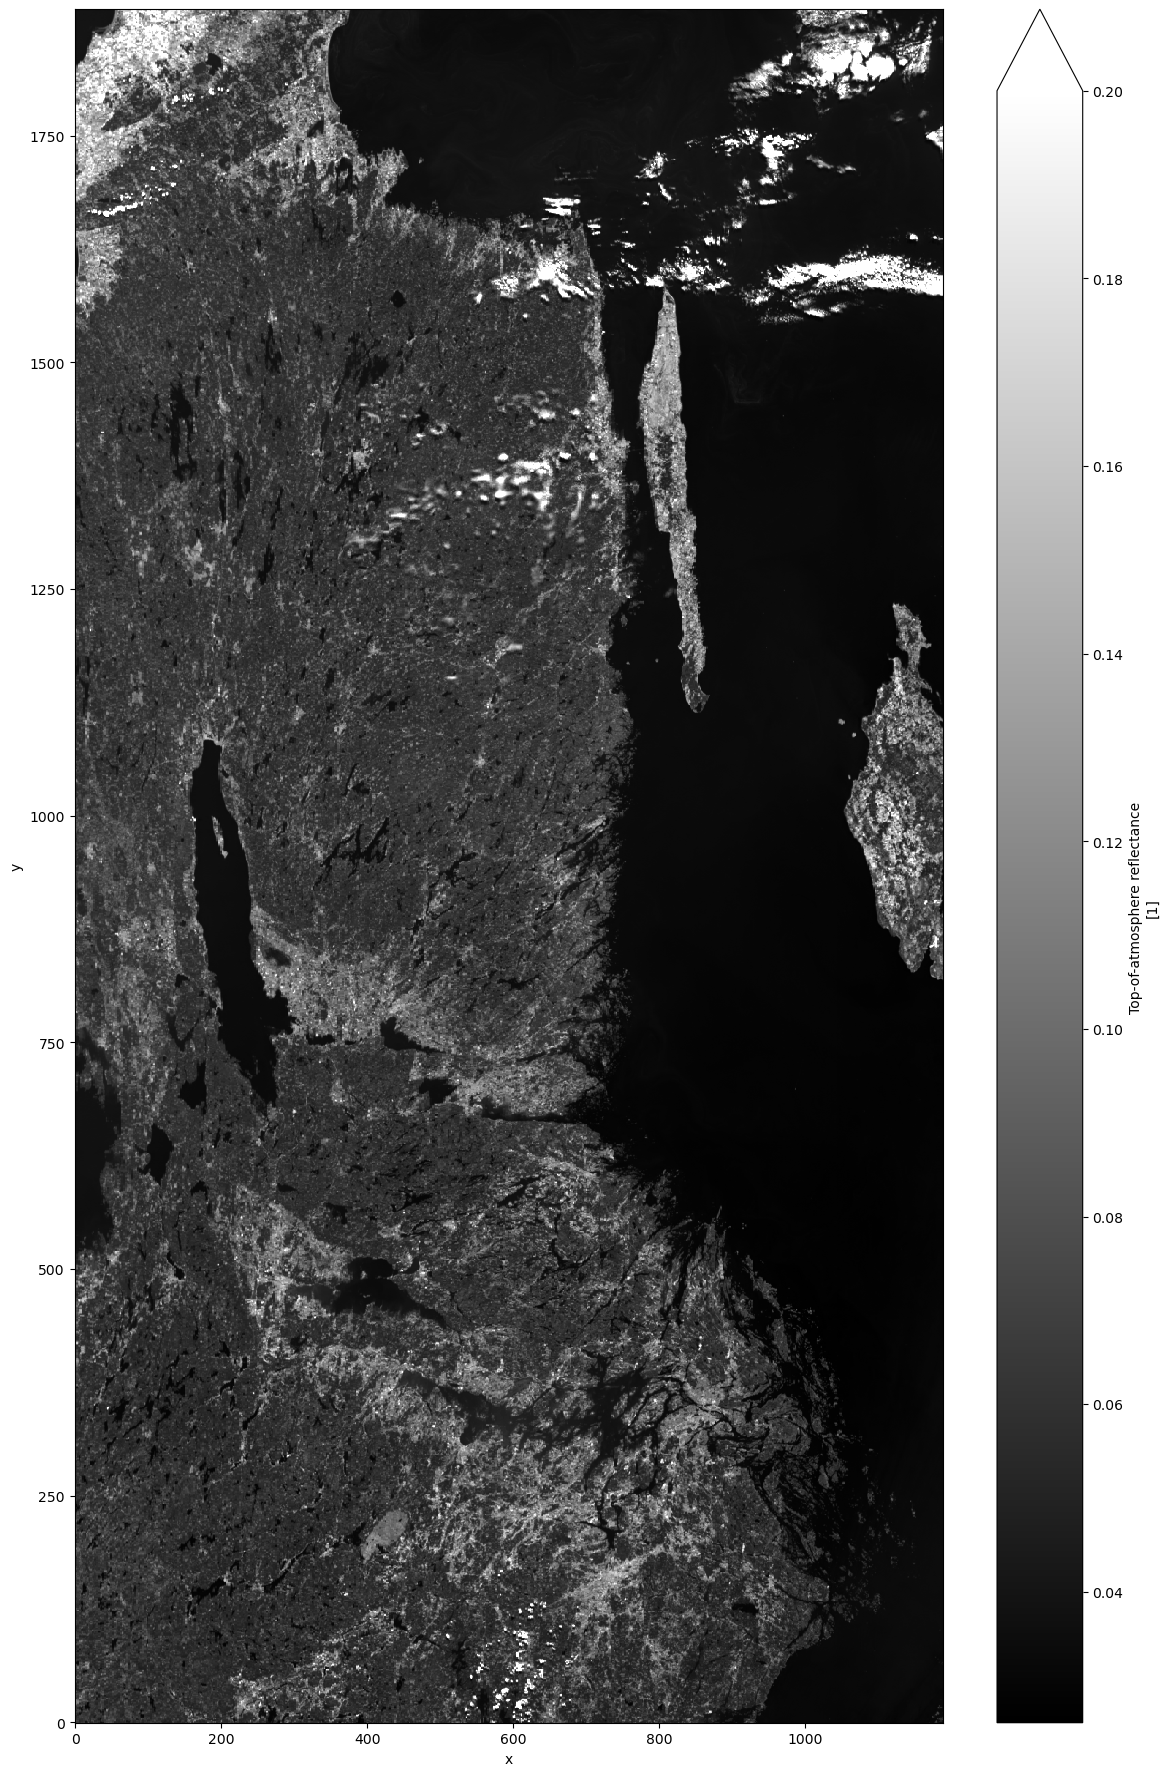

In [4]:
%%time
imshow(source_ds.rtoa_8)

In [5]:
%%time
target_ds = rectify_dataset(source_ds, spline_orders=0)
target_ds

CPU times: user 2.48 s, sys: 247 ms, total: 2.73 s
Wall time: 1.43 s


<xarray.Dataset> Size: 102MB
Dimensions:        (lon: 2926, lat: 2177)
Coordinates:
  * lon            (lon) float64 23kB 12.69 12.7 12.7 12.7 ... 20.0 20.0 20.01
  * lat            (lat) float64 17kB 60.64 60.64 60.64 ... 55.21 55.2 55.2
    spatial_ref    int64 8B 0
Data variables:
    quality_flags  (lat, lon) uint32 25MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_3         (lat, lon) float32 25MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_6         (lat, lon) float32 25MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_8         (lat, lon) float32 25MB dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

CPU times: user 2.25 s, sys: 359 ms, total: 2.61 s
Wall time: 1.22 s


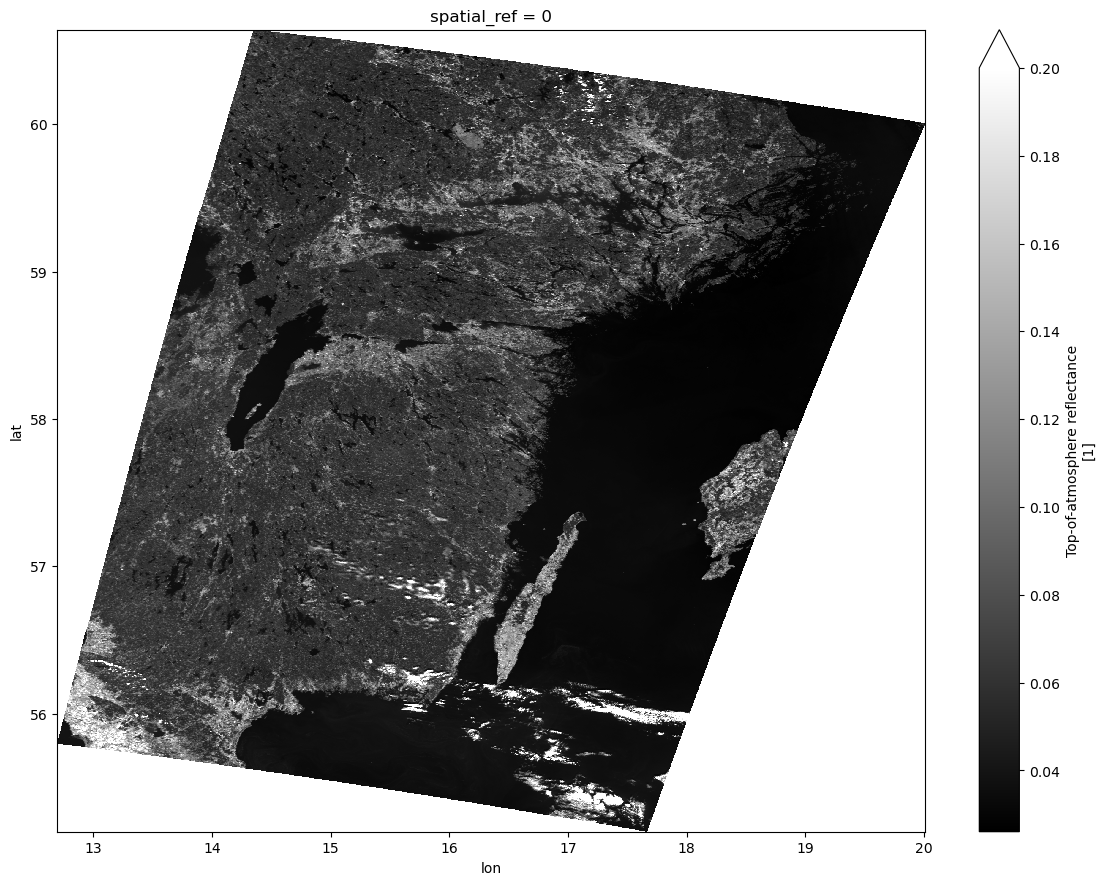

In [6]:
%%time
imshow(target_ds.rtoa_8)

In [7]:
%%time
target_ds = rectify_dataset(source_ds, spline_orders=0, tile_size=2048)
target_ds

CPU times: user 2.43 s, sys: 145 ms, total: 2.58 s
Wall time: 1.5 s


<xarray.Dataset> Size: 102MB
Dimensions:        (lon: 2926, lat: 2177)
Coordinates:
  * lon            (lon) float64 23kB 12.69 12.7 12.7 12.7 ... 20.0 20.0 20.01
  * lat            (lat) float64 17kB 60.64 60.64 60.64 ... 55.21 55.2 55.2
    spatial_ref    int64 8B 0
Data variables:
    quality_flags  (lat, lon) uint32 25MB dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    rtoa_3         (lat, lon) float32 25MB dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    rtoa_6         (lat, lon) float32 25MB dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    rtoa_8         (lat, lon) float32 25MB dask.array<chunksize=(2048, 2048), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

CPU times: user 1.26 s, sys: 124 ms, total: 1.38 s
Wall time: 985 ms


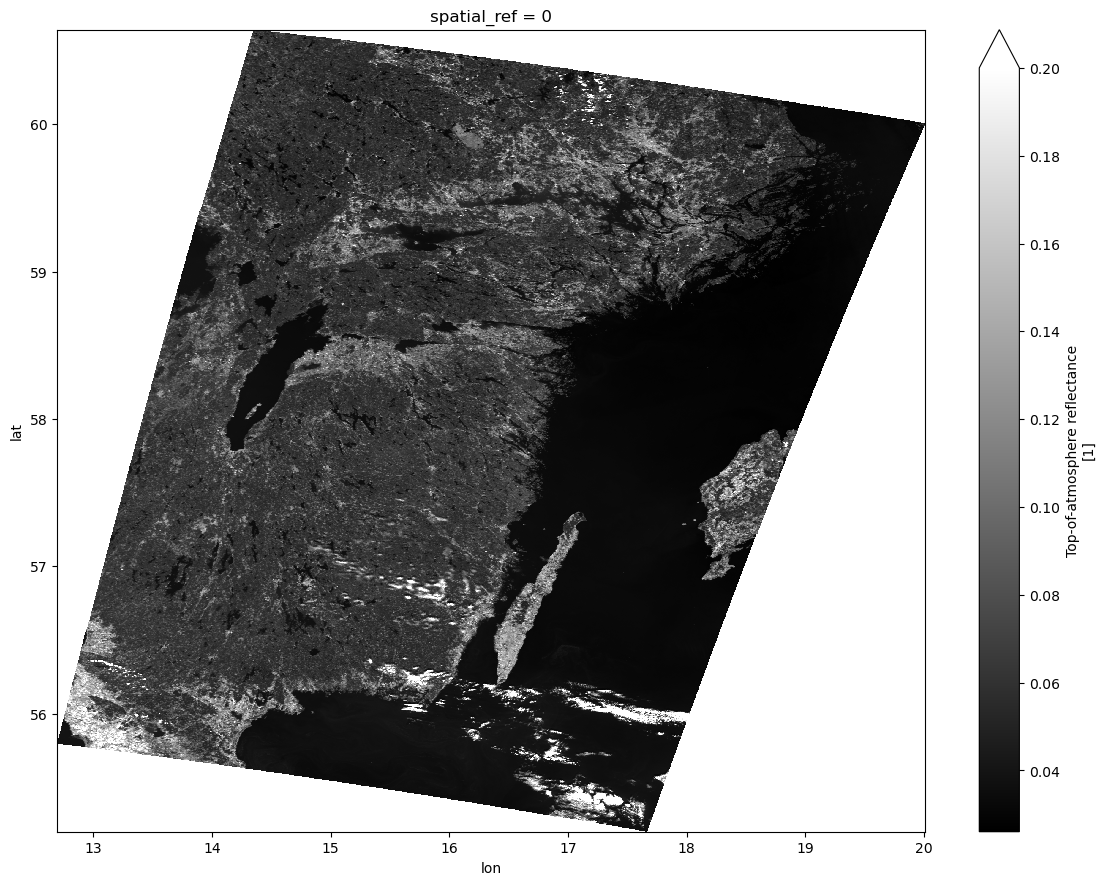

In [8]:
%%time
imshow(target_ds.rtoa_8)

CPU times: user 1.19 s, sys: 119 ms, total: 1.3 s
Wall time: 920 ms


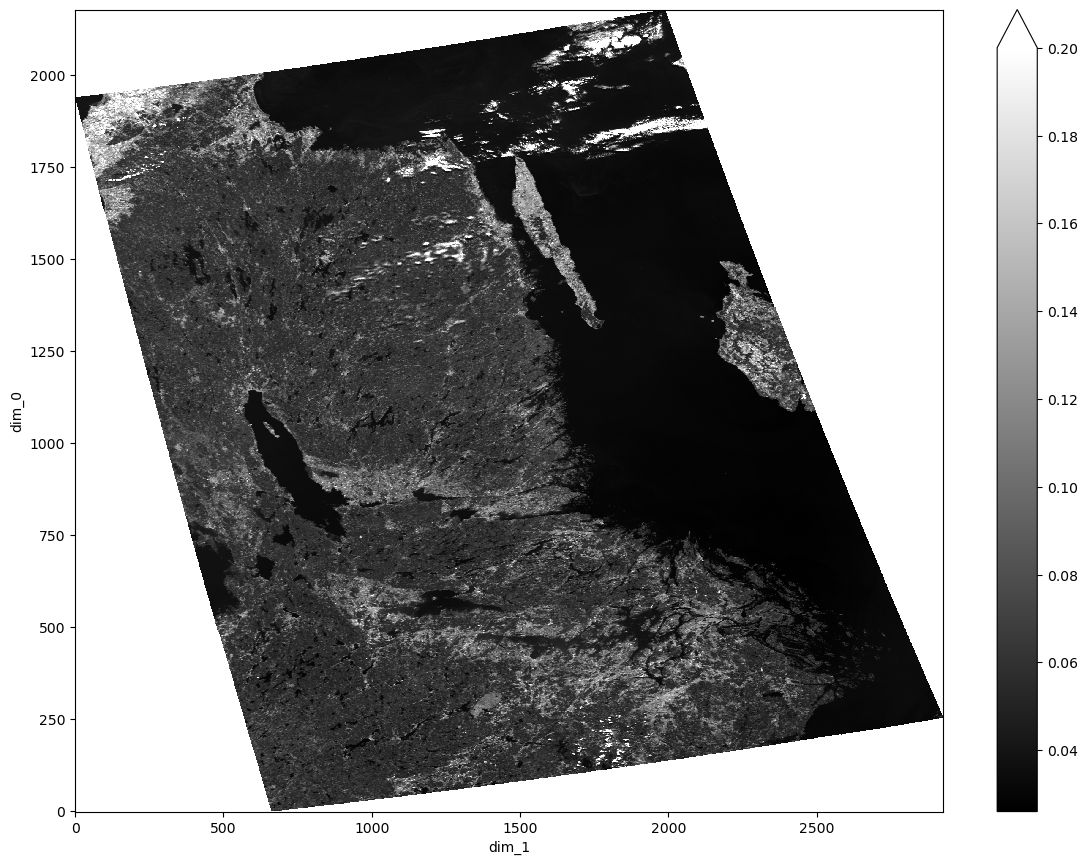

In [9]:
%%time
imshow(xr.DataArray(target_ds.rtoa_8.values))

In [14]:
%%time
target_ds_interp = rectify_dataset(source_ds, spline_orders=2)
target_ds_interp

CPU times: user 4.52 s, sys: 239 ms, total: 4.76 s
Wall time: 2.96 s


<xarray.Dataset> Size: 102MB
Dimensions:        (lon: 2926, lat: 2177)
Coordinates:
  * lon            (lon) float64 23kB 12.69 12.7 12.7 12.7 ... 20.0 20.0 20.01
  * lat            (lat) float64 17kB 60.64 60.64 60.64 ... 55.21 55.2 55.2
    spatial_ref    int64 8B 0
Data variables:
    quality_flags  (lat, lon) uint32 25MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_3         (lat, lon) float32 25MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_6         (lat, lon) float32 25MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_8         (lat, lon) float32 25MB dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

CPU times: user 4.3 s, sys: 244 ms, total: 4.55 s
Wall time: 1.75 s


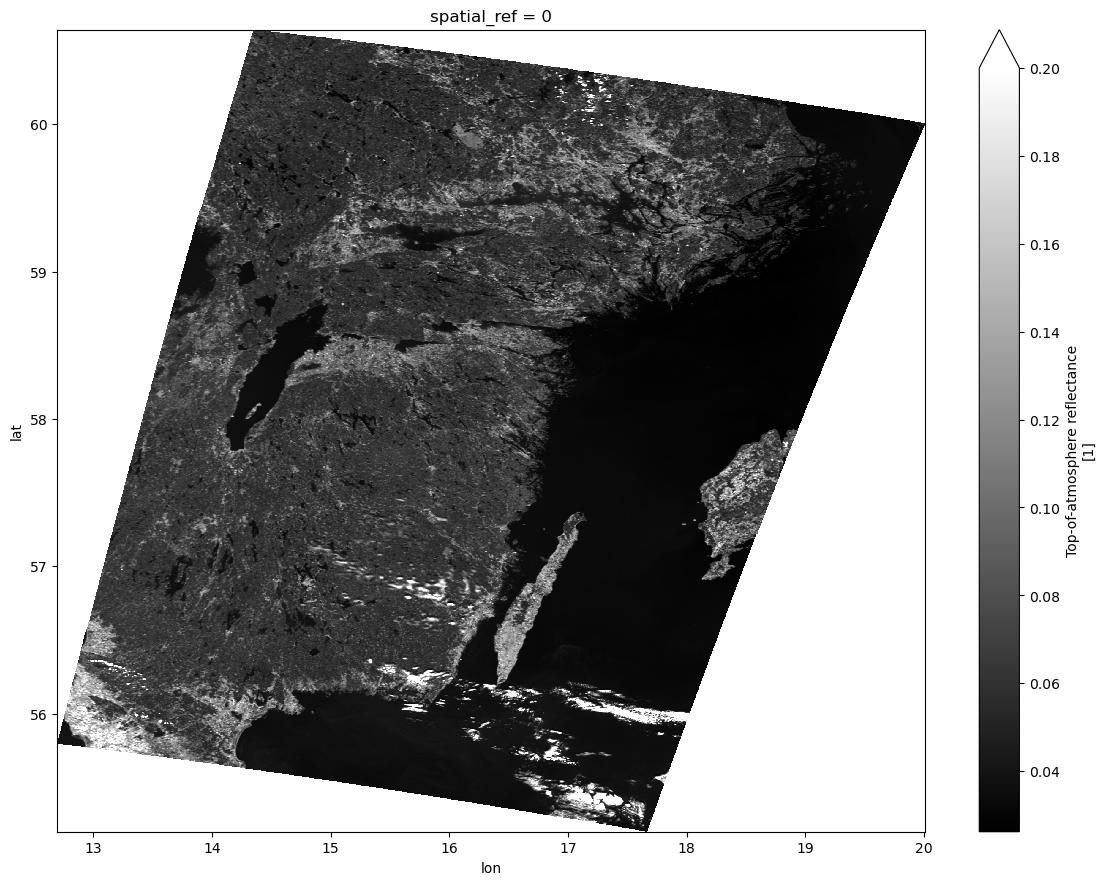

In [15]:
%%time
imshow(target_ds_interp.rtoa_8)

In [16]:
rtoa_8_diff = target_ds_interp.rtoa_8 - target_ds.rtoa_8

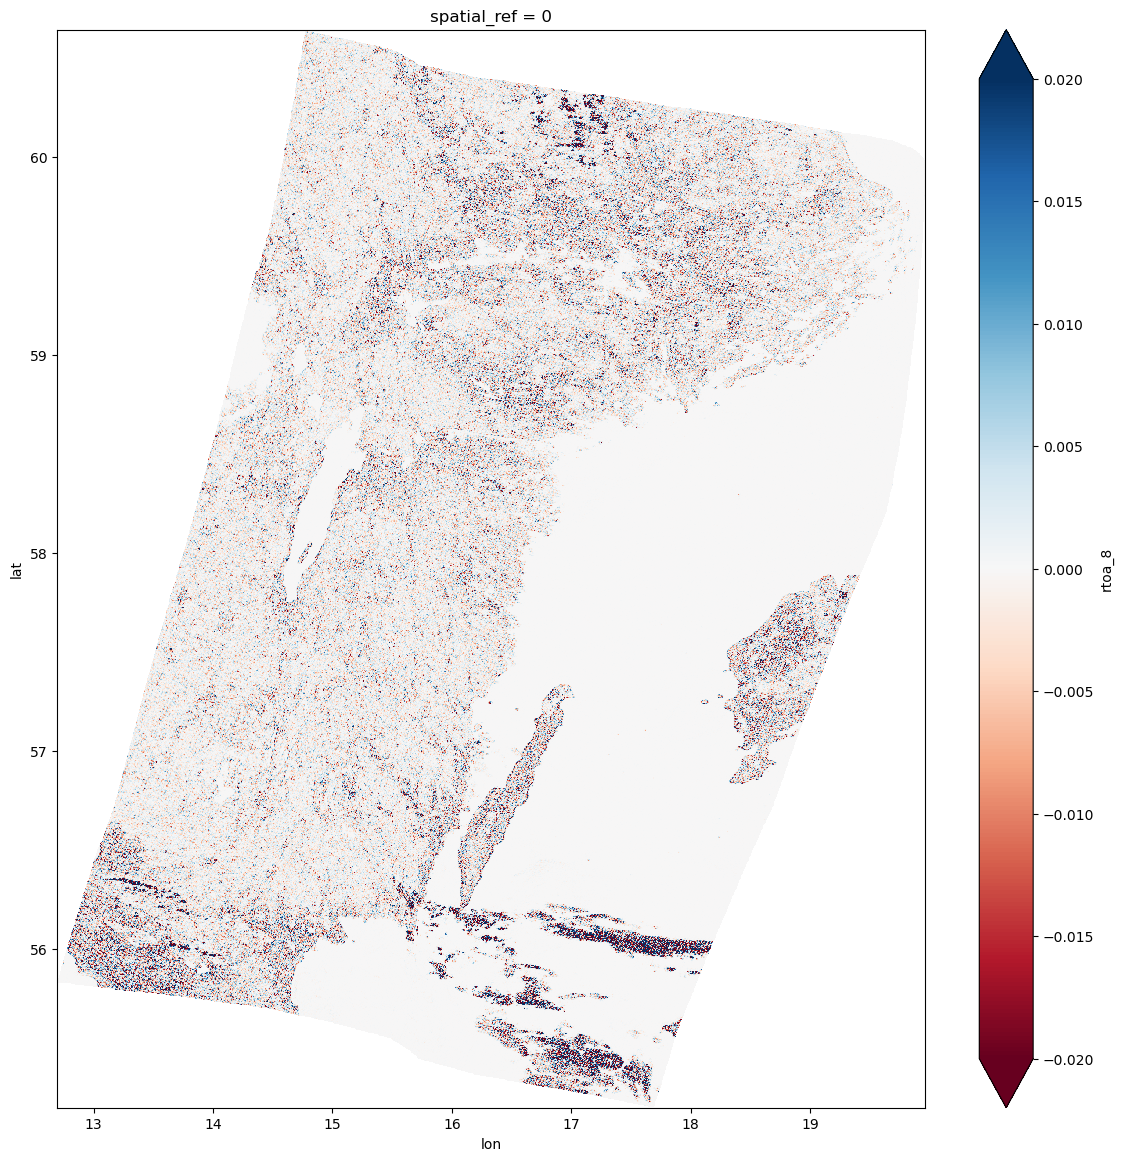

In [17]:
rtoa_8_diff.plot.imshow(figsize=(14, 14), vmin=-0.02, vmax=+0.02, cmap="RdBu")